# The purpose here is to share some very basic code useful for
<br>
unsupervised learning. Unsupervised learning is for when there is no target variable and the aim is to group, or cluster, the data into similar records. Yes, this data is a "textbook" example, being very small, and cherry-picked in such a way as to make it as intuitive for a person just starting to learn as possible. For a real-world problem set, the natural groups will not be as discernable on a scatterplot, and the data will probably have more features and observations. Nonetheless, the concepts and code (with just some minor tweaks) would still apply to a real-world problem set.
<br>
<br>
The data is stock data coming from Charles Schwab on 31mar2022.


# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

In [2]:
#sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(15.7,7.27)})

In [3]:
df1 = pd.read_csv('clustering_with_dendrogram_example.csv')

# Display the first five rows of the dataframe and a scatterplot

,Symbol,Price,Earnings
0,AC,41.91,2.74
1,APA,41.33,2.62
2,BEPC,43.80,2.64
3,BVH,29.57,2.70
4,BXMT,31.79,2.75


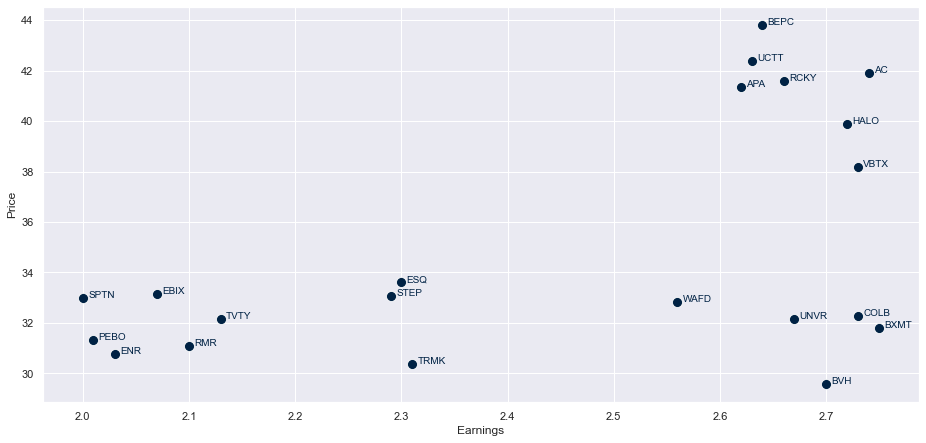

In [4]:
display(df1.head(5))

sns.scatterplot(data = df1, x='Earnings', y='Price', s=100, color='#002244')
for i in range(df1.shape[0]):
    plt.text(x=df1.Earnings.tolist()[i]+0.005,y=df1.Price.tolist()[i]+0.005, 
             s=df1.Symbol.tolist()[i], 
          fontdict=dict(color='#002244',size=10))
          #bbox=dict(facecolor='yellow',alpha=0.5))
plt.show()

# Use the elbow method to determine the number of clusters:

Inertia measures how spread out the clusters are (lower is better) or put differently, the distance from each sample to the centroid of its cluster. K-means attempts to minimize inertia when choosing clusters. 
<br>
<br>
Use the Elbow method to determine the best number of clusters.  That means, choosing the number of clusters corresponding to the “elbow” location in the line plot BELOW where inertia begins to decrease more slowly. Based on the scatter plot ABOVE, 3-4 appears to be the optimal number of clusters for k-means as it appears to be 3-4 natural groups in the scatterplot.  

# StandardScaler is a "preprocessing" step, that is crucial to use first with k-means. If not used, the algorithm will not group properly. MaxAbsScaler and Normalizer are also acceptable alternatives.

C:\Users\henry\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


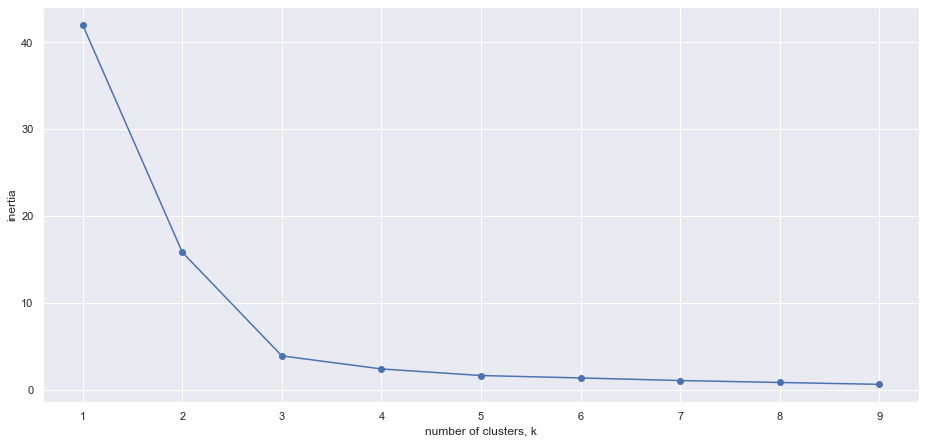

In [5]:
samples = df1[['Price', 'Earnings']] #Hypothetically, df1[['Price', 'Earnings', 'Feature3']] if data had more features
scaler = StandardScaler()
scaler.fit(samples)
samples_scaled = scaler.transform(samples)

ks = range(1, 10)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(samples_scaled)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

# Using the elbow method with the chart above, 3 is the number of clusters I will choose.  No surprise there based on the scatterplot.

# Set n_clusters = 3 and preform k-means clustering on the data:

In [6]:
scaler = StandardScaler()
kmeans = KMeans(n_clusters=3)  #set n_cluster=n right here
pipeline = make_pipeline(scaler, kmeans)
pipeline.fit(samples)
labels = pipeline.predict(samples)
df1['label'] = labels

# View the dataframe:

In [7]:
df1.sort_values(by='label').head(21)

,Symbol,Price,Earnings,label
10,PEBO,31.31,2.01,0
16,TVTY,32.17,2.13,0
15,TRMK,30.39,2.31,0
14,STEP,33.06,2.29,0
13,SPTN,32.99,2.00,0
6,EBIX,33.15,2.07,0
7,ENR,30.76,2.03,0
8,ESQ,33.61,2.30,0
12,RMR,31.10,2.10,0
17,UCTT,42.39,2.63,1


# View the data with a scatterplot utilizing the "hue" option.  This will color each cluster according to its value.

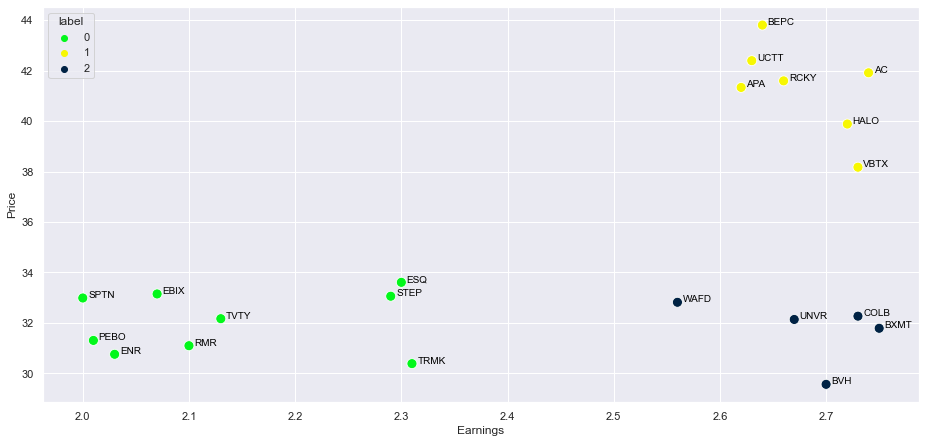

In [8]:
sns.scatterplot(data = df1,
                x='Earnings',
                y='Price',
                hue='label',
                palette = {0 : '#02f71b', 1 : '#f7f702', 2 : '#002244'},
                s = 100
               )
for i in range(df1.shape[0]):
    plt.text(x=df1.Earnings.tolist()[i]+0.005,y=df1.Price.tolist()[i]+0.005,
             s=df1.Symbol.tolist()[i], 
          fontdict=dict(color='black',size=10))
plt.show()

# Create some fictitious data and plot it with the other data points.  Color the new points red:

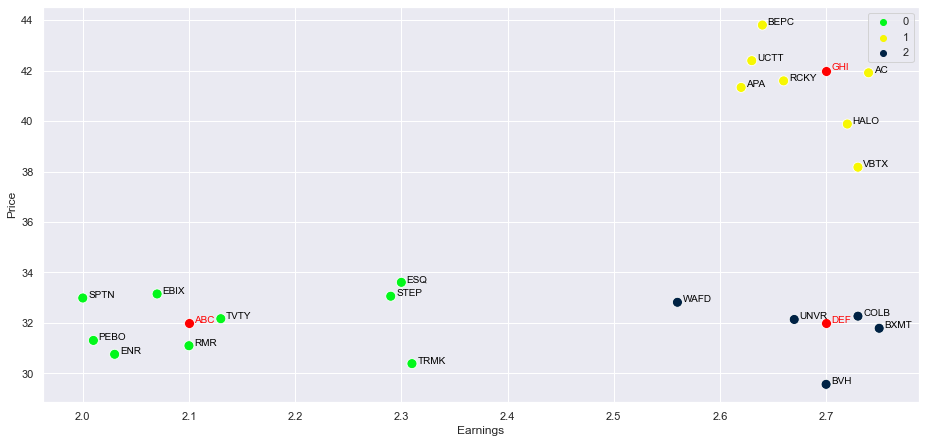

In [9]:
df_fictious_data = pd.DataFrame({
    'Symbol' : ['ABC', 'DEF', 'GHI'],
    'Price' : [32.00, 32.00, 42.00],
    'Earnings' : [2.1, 2.7, 2.7]
})


sns.scatterplot(data = df1,
                x='Earnings',
                y='Price',
                hue='label',
                palette = {0 : '#02f71b', 1 : '#f7f702', 2 : '#002244'},
                s = 100
               )
for i in range(df1.shape[0]):
    plt.text(x=df1.Earnings.tolist()[i]+0.005,y=df1.Price.tolist()[i]+0.005,
             s=df1.Symbol.tolist()[i], 
             fontdict=dict(color='black',size=10))
    
sns.scatterplot(data = df_fictious_data, x='Earnings', y='Price', color = 'red', s = 100)
for i in range(df_fictious_data.shape[0]):
    plt.text(x=df_fictious_data.Earnings.tolist()[i]+0.005,
             y=df_fictious_data.Price.tolist()[i]+0.005,
             s=df_fictious_data.Symbol.tolist()[i], 
          fontdict=dict(color='red',size=10))
plt.show()

# If k-means assigned a label "0" to "ABC", "2"  to "DEF" and "1" to "GHI" it would make sense, and indeed it does, verified by the code below:

In [10]:
new_labels = pipeline.predict(df_fictious_data[['Price', 'Earnings']])
df_fictious_data['label'] = new_labels
df_fictious_data.head()

,Symbol,Price,Earnings,label
0,ABC,32.0,2.1,0
1,DEF,32.0,2.7,2
2,GHI,42.0,2.7,1


# Visualizing data with a dendrogram is common with clustering.
<br>
<br>
Disclaimer: With a larger, more realistic dataframe, the dendrogram will look cluttered and messy.
<br>
<br>
The higher up on the dendrogram where a join happens, the more dissimilarity. Eg, HALO, and STEP are in separate groups at different corners of the scatter plot and do not join until a height of about 2.75, which is high. BXMT and COLB on the other hand, are deemed similar and join at a much lower height of approximately 0.25.
<br>
<br>
A word regarding the X-axis of the dendrogram:
<br>
The proximity of two labels on the X-axis of the dendrogram matters if the labels are in the same group (color).  Outside the same group, the proximity of two labels on the X does not matter.  For example, BXMT and COLB are both in the same group and are in close proximity in the scatterplot, thus they are close together on the dendrogram's X-axis.
<br>
COLB and EBIX are also close together on the dendrogram's X axis, however they are of different groups (colors), so that does not mean they are deemed just as similar. 
<br>
<br>
I placed a black horizontal line on the dendrogram with a y-intercept of 1.5 to help illustrate that at a level of 1.5, there are three clusters as the black horizontal line crosses three vertical lines. At different levels, there would be a different amount of clusters.


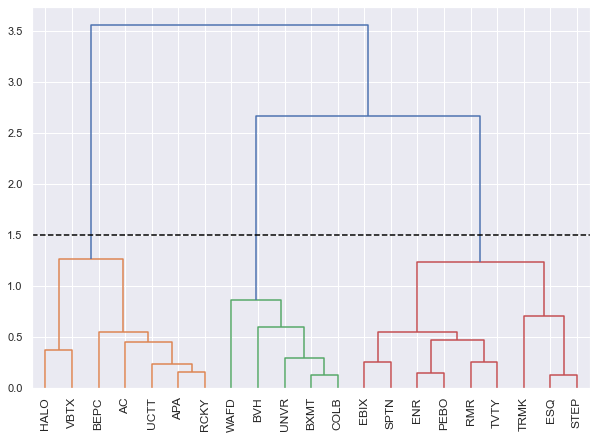

In [11]:
scaler = StandardScaler()
scaler.fit(samples)
StandardScaler(copy=True, with_mean=True, with_std=True)
samples_scaled = scaler.transform(samples)

Symbol = df1.Symbol.tolist()
plt.figure(figsize=(10, 7))
mergings = linkage(samples_scaled, method='complete')
dendrogram(mergings,
labels=Symbol,
leaf_rotation=90,
leaf_font_size=6)
plt.axhline(y=1.5, color='black', linestyle='--')
plt.xticks(fontsize= 12)
plt.show()

# How to extract the labels of the clusters at a level n (1.5) 

In [12]:
labels = fcluster(mergings, 1.5, criterion='distance')
print(labels)

[1 1 1 2 2 2 3 3 3 1 3 1 3 3 3 3 3 1 2 1 2]
